In [122]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
import zipfile

In [123]:
zf = zipfile.ZipFile('titanic.zip')

if os.path.exists('prediction.csv'):
    os.remove('prediction.csv')
else:
    print('file not here')


file not here


In [124]:
df_test = pd.read_csv(zf.open('test.csv'))
df_train = pd.read_csv(zf.open('train.csv'))


#df_train.drop(columns=['Age'], inplace=True)
#df_test.drop(columns=['Age'], inplace=True)
df_test['Sex_new'] = (df_test['Sex']== 'female').astype(int)
df_train['Sex_new'] = (df_train['Sex']== 'female').astype(int)
#print(df_train.describe())
#print(df_test.describe())

df_train = df_train.dropna(subset=['Age'])
df_testID =pd.DataFrame(df_test)
#df_test = df_test.dropna(subset=['Age'])
df_train.drop(columns=['PassengerId','SibSp', 'Parch', 'Embarked'], inplace=True)
df_test.drop(columns=['PassengerId','SibSp', 'Parch', 'Embarked'], inplace=True)

#df_train.describe()
df_test.describe()
#df_testID.describe()



,Pclass,Age,Fare,Sex_new
count,418.000000,332.000000,417.000000,418.000000
mean,2.265550,30.272590,35.627188,0.363636
std,0.841838,14.181209,55.907576,0.481622
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,21.000000,7.895800,0.000000
50%,3.000000,27.000000,14.454200,0.000000
75%,3.000000,39.000000,31.500000,1.000000
max,3.000000,76.000000,512.329200,1.000000


In [125]:
#df_test['Sex_new'] = (df_test['Sex']== 'female').astype(int)
#f_train['Sex_new'] = (df_train['Sex']== 'female').astype(int)

In [126]:
def create_model(input_shape,my_learning_rate):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer= 'adam',
        loss = 'BinaryCrossentropy',
        metrics = ['accuracy']              
    )
    return model



In [127]:
def train_model(model,train_feature, train_label, epochs, batch_size):

    history = model.fit(
        x = train_feature, 
        y=train_label, 
        batch_size=batch_size, 
        epochs = epochs,
        )
    #validation_split=0.2
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

In [128]:
learning_rate = 0.0001
epochs = 300
batch_size = 5

#Define information needed
label_name = 'Survived' #train_label
#feature_name = ['Pclass', 'Sex_new', 'SibSp', 'Parch', 'Fare', 'Embarked'] #train_feature 
#The above had too many f
feature_name = ['Pclass','Age', 'Fare', 'Sex_new'] #train_feature 

In [129]:

train_labels = df_train[label_name].values
df_train.drop(columns=['Survived'], inplace=True)
train_features= df_train[feature_name].values

# Filter Numeric Columns
numeric_columns = df_train.select_dtypes(include=[np.number]).columns

# Check if numeric_columns is empty
if len(numeric_columns) == 0:
    print("No numeric columns found in train_features. Unable to train the model.")
else:
    # Extract numeric columns from DataFrame
    train_features = df_train[numeric_columns]


# Convert the data to NumPy arrays
train_features = train_features.values


# Normalize the numeric features to improve training performance
train_features = (train_features - train_features.mean(axis=0)) / train_features.std(axis=0)


# Create the model with the correct input shape
input_shape = (train_features.shape[1],)  # Number of features as input shape




Epoch 1/300
143/143 [==============================] - 1s 1ms/step - loss: 0.5036 - accuracy: 0.7703
Epoch 2/300
143/143 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8053
Epoch 3/300
143/143 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7941
Epoch 4/300
143/143 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8109
Epoch 5/300
143/143 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8067
Epoch 6/300
143/143 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8095
Epoch 7/300
143/143 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8067
Epoch 8/300
143/143 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8109
Epoch 9/300
143/143 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8165
Epoch 10/300
143/143 [==============================] - 0s 2ms/step - loss: 0.4031 - accura

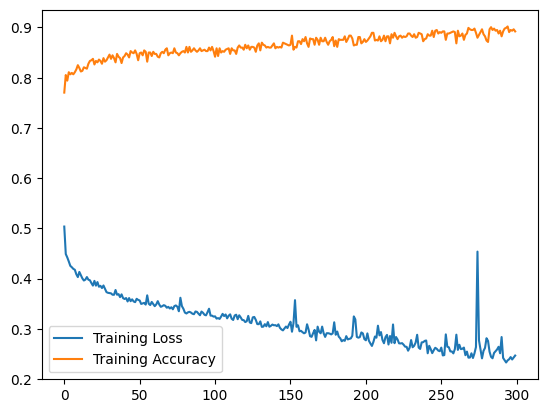

In [130]:
my_model = create_model(input_shape, learning_rate)

epochs, hist = train_model(my_model, train_features, train_labels, epochs, batch_size)

#plt.plot(epochs, hist)

plt.plot(epochs, hist['loss'], label='Training Loss')
plt.plot(epochs, hist['accuracy'], label='Training Accuracy')
#plt.plot(epochs, hist['val_loss'], label='Validation Loss')
#plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

In [131]:
# Filter Numeric Columns in test data
test_numeric_columns = df_test.select_dtypes(include=[np.number]).columns
test_features = df_test[test_numeric_columns]

#train_features = np.delete(train_features,1,1)
#print (train_features)

# Calculate mean and standard deviation from training data
train_mean = train_features.mean(axis=0)
train_std = train_features.std(axis=0)

#print(train_mean)

# Normalize the numeric features in the test data using the mean and standard deviation from training data
#test_features = (test_features - train_mean) / train_std

#print (test_features)
# Make predictions on the normalized test data
predictions = my_model.predict(test_features)



#formatP = np.round(predictions)



prediction_df = pd.DataFrame(formatP, columns = ["Prediction"])
print(prediction_df)

#merged_df = 


kaggle_Predictions = pd.DataFrame({
    "PassengerId":df_testID.PassengerId,
    "Survived": prediction_df.Prediction
})


#kaggle_Predictions = kaggle_Predictions.iloc[:,0:]
kaggle_Predictions.to_csv('predictionTestMLModel1.csv')




14/14 [==============================] - 0s 1ms/step
     Prediction
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
..          ...
327         0.0
328         0.0
329         0.0
330         0.0
331         0.0

[332 rows x 1 columns]
